In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/filtered-and-translated-nlp/filr.csv')

In [4]:
X = data.Translated
y = data.Label

In [5]:
import numpy as np

# Load GloVe model
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_path = "/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt"
glove_embeddings = load_glove_embeddings(glove_path)

print(f"Loaded {len(glove_embeddings)} word vectors.")


Loaded 400000 word vectors.


In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Let's assume X is defined
# X = ["This is a sentence", "Another sentence here"]

def preprocess(text):
    # Lowercase and remove non-alphabetic characters
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [t for t in tokens if t not in ENGLISH_STOP_WORDS]

def embed_sentence(sentence, embeddings, dim=200):
    tokens = preprocess(sentence)
    vectors = [embeddings[word] for word in tokens if word in embeddings]
    if len(vectors) == 0:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

# Embed each sentence in X
embedded_X = np.array([embed_sentence(sent, glove_embeddings) for sent in X])

print("Shape of embedded_X:", embedded_X.shape)


Shape of embedded_X: (480, 200)


In [7]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

# Sample data in X (update this with your actual sentences if needed)
# X = ["I like deep learning", "I like NLP", "I enjoy flying"]

# Tokenize and clean
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

tokenized_X = [tokenize(sentence) for sentence in X]
vocab = sorted(set(word for sentence in tokenized_X for word in sentence))
word2id = {word: idx for idx, word in enumerate(vocab)}
id2word = {idx: word for word, idx in word2id.items()}

# Initialize co-occurrence matrix
vocab_size = len(vocab)
co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

# Set context window size
window_size = 2

# Build co-occurrence counts
for tokens in tokenized_X:
    for idx, center_word in enumerate(tokens):
        center_id = word2id[center_word]
        context_ids = list(range(max(idx - window_size, 0), idx)) + \
                      list(range(idx + 1, min(idx + window_size + 1, len(tokens))))
        
        for context_idx in context_ids:
            context_word = tokens[context_idx]
            context_id = word2id[context_word]
            co_matrix[center_id, context_id] += 1

# Convert to DataFrame for prettier display
co_df = pd.DataFrame(co_matrix, index=vocab, columns=vocab)
print(co_df)


         00  000  02  03  084  1  10  100  10may  11  ...  è  žirinovsky  \
00        0    0   0   0    0  0   0    0      0   0  ...  0           0   
000       0    0   0   0    0  1   0    1      0   0  ...  0           0   
02        0    0   0   0    0  0   0    0      0   0  ...  0           0   
03        0    0   0   0    0  0   0    0      0   1  ...  0           0   
084       0    0   0   0    0  1   0    0      0   0  ...  0           0   
...      ..  ...  ..  ..  ... ..  ..  ...    ...  ..  ... ..         ...   
защитой   0    0   0   0    0  0   0    0      0   0  ...  0           0   
перемен   0    0   0   0    0  0   0    0      0   0  ...  0           0   
под       0    0   0   0    0  0   0    0      0   0  ...  0           0   
ты        0    0   0   0    0  0   0    0      0   0  ...  0           0   
방탄소년단     0    0   0   0    0  0   0    0      0   0  ...  0           0   

         ассанж  джулиан  з  защитой  перемен  под  ты  방탄소년단  
00            0        

In [10]:
import numpy as np
import pandas as pd
import re

# Input sentence
sentence = '''In an intense 9-minute video on Twitter,Arnold Schwarzenegger,speaks to his fans and to Russian soldiers: "Your government is lying to you. "And then he also addresses Putin: "You started this war,you are leading this war,you can stop this war."'''
window_size = 5

# Tokenize
tokens = re.findall(r'\b\w+\b', sentence.lower())
vocab = sorted(set(tokens))
word2id = {word: i for i, word in enumerate(vocab)}
id2word = {i: word for word, i in word2id.items()}
vocab_size = len(vocab)

# Initialize matrix
co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

# Build co-occurrence counts
for idx, center_word in enumerate(tokens):
    center_id = word2id[center_word]
    context_ids = list(range(max(0, idx - window_size), idx)) + \
                  list(range(idx + 1, min(len(tokens), idx + window_size + 1)))
    
    for context_idx in context_ids:
        context_word = tokens[context_idx]
        context_id = word2id[context_word]
        co_matrix[center_id, context_id] += 1

# Convert to DataFrame
co_df = pd.DataFrame(co_matrix, index=vocab, columns=vocab)
print(co_df)


                9  addresses  also  an  and  are  arnold  can  fans  \
9               0          0     0   1    0    0       1    0     0   
addresses       0          0     1   0    1    0       0    0     0   
also            0          1     0   0    1    0       0    0     0   
an              1          0     0   0    0    0       0    0     0   
and             0          1     1   0    0    0       0    0     1   
are             0          0     0   0    0    0       0    1     0   
arnold          1          0     0   0    0    0       0    0     1   
can             0          0     0   0    0    1       0    0     0   
fans            0          0     0   0    1    0       1    0     0   
government      0          0     0   0    2    0       0    0     0   
he              0          1     1   0    1    0       0    0     0   
his             0          0     0   0    1    0       1    0     1   
in              1          0     0   1    0    0       0    0     0   
intens

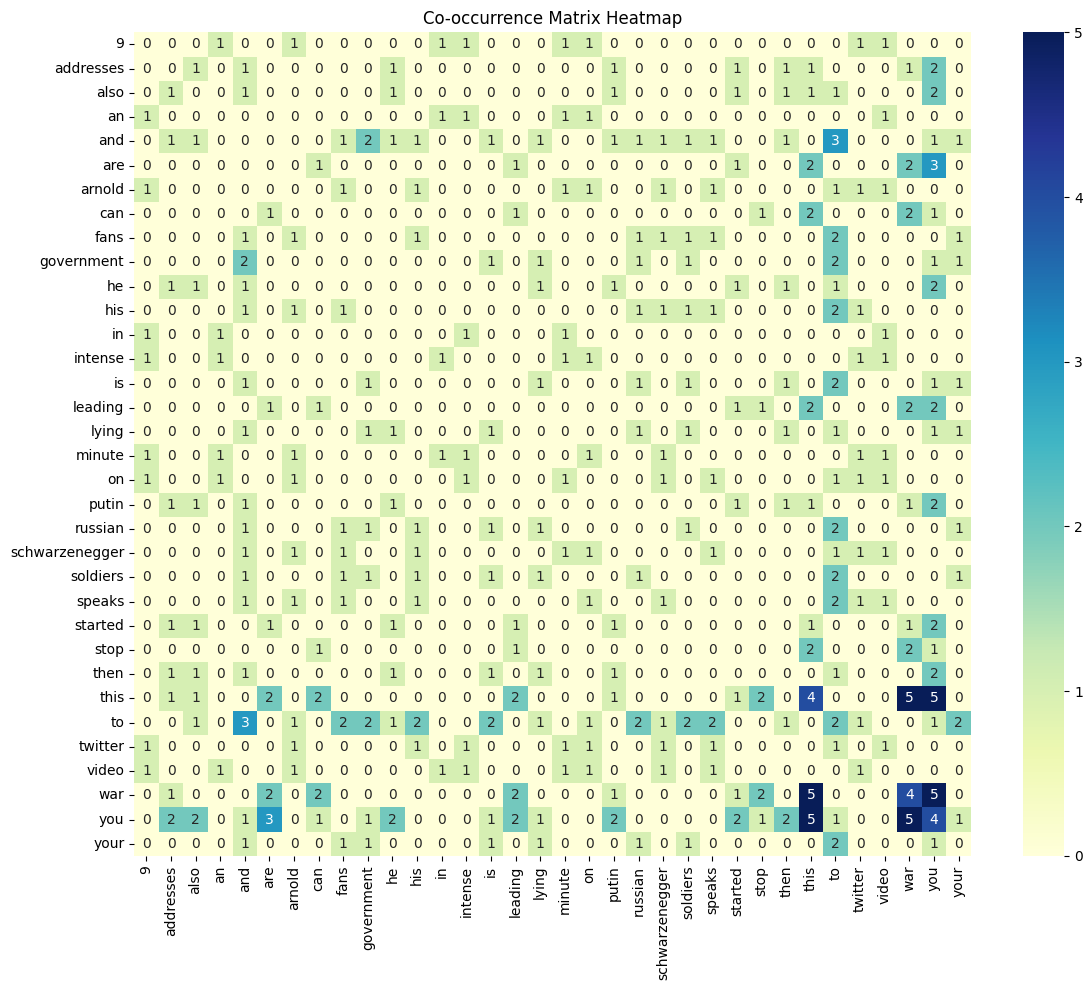

In [11]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Input sentence
sentence = '''In an intense 9-minute video on Twitter,Arnold Schwarzenegger,speaks to his fans and to Russian soldiers: "Your government is lying to you. "And then he also addresses Putin: "You started this war,you are leading this war,you can stop this war."'''
window_size = 5

# Tokenize
tokens = re.findall(r'\b\w+\b', sentence.lower())
vocab = sorted(set(tokens))
word2id = {word: i for i, word in enumerate(vocab)}
id2word = {i: word for word, i in word2id.items()}
vocab_size = len(vocab)

# Initialize matrix
co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

# Build co-occurrence counts
for idx, center_word in enumerate(tokens):
    center_id = word2id[center_word]
    context_ids = list(range(max(0, idx - window_size), idx)) + \
                  list(range(idx + 1, min(len(tokens), idx + window_size + 1)))
    
    for context_idx in context_ids:
        context_word = tokens[context_idx]
        context_id = word2id[context_word]
        co_matrix[center_id, context_id] += 1

# Convert to DataFrame
co_df = pd.DataFrame(co_matrix, index=vocab, columns=vocab)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_df, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Co-occurrence Matrix Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
